In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn kagglehub 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import kagglehub
import os
import warnings
warnings.filterwarnings('ignore')

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


IRIS FLOWER CLASSIFICATION MODEL

📥 Downloading dataset from Kaggle...


100%|██████████| 0.99k/0.99k [00:00<00:00, 2.81MB/s]

Extracting files...
✓ Dataset downloaded to: /home/codespace/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1
✓ Loading file: IRIS.csv

1. Dataset Overview:
Shape: (150, 5)

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   s

✓ Pairplot saved as 'iris_pairplot.png'
✓ Correlation heatmap saved as 'iris_correlation.png'
✓ Box plots saved as 'iris_boxplots.png'

4. Data Preprocessing:
Features shape: (150, 4)
Target shape: (150,)

Label encoding: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}

Training set size: 120
Testing set size: 30
✓ Feature scaling completed

5. Training Multiple Models:

Training Logistic Regression...
✓ Logistic Regression Accuracy: 0.9333 (93.33%)

Classification Report for Logistic Regression:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

✓ Confusion matrix saved

Training Decision Tree...


<Figure size 1500x1000 with 0 Axes>

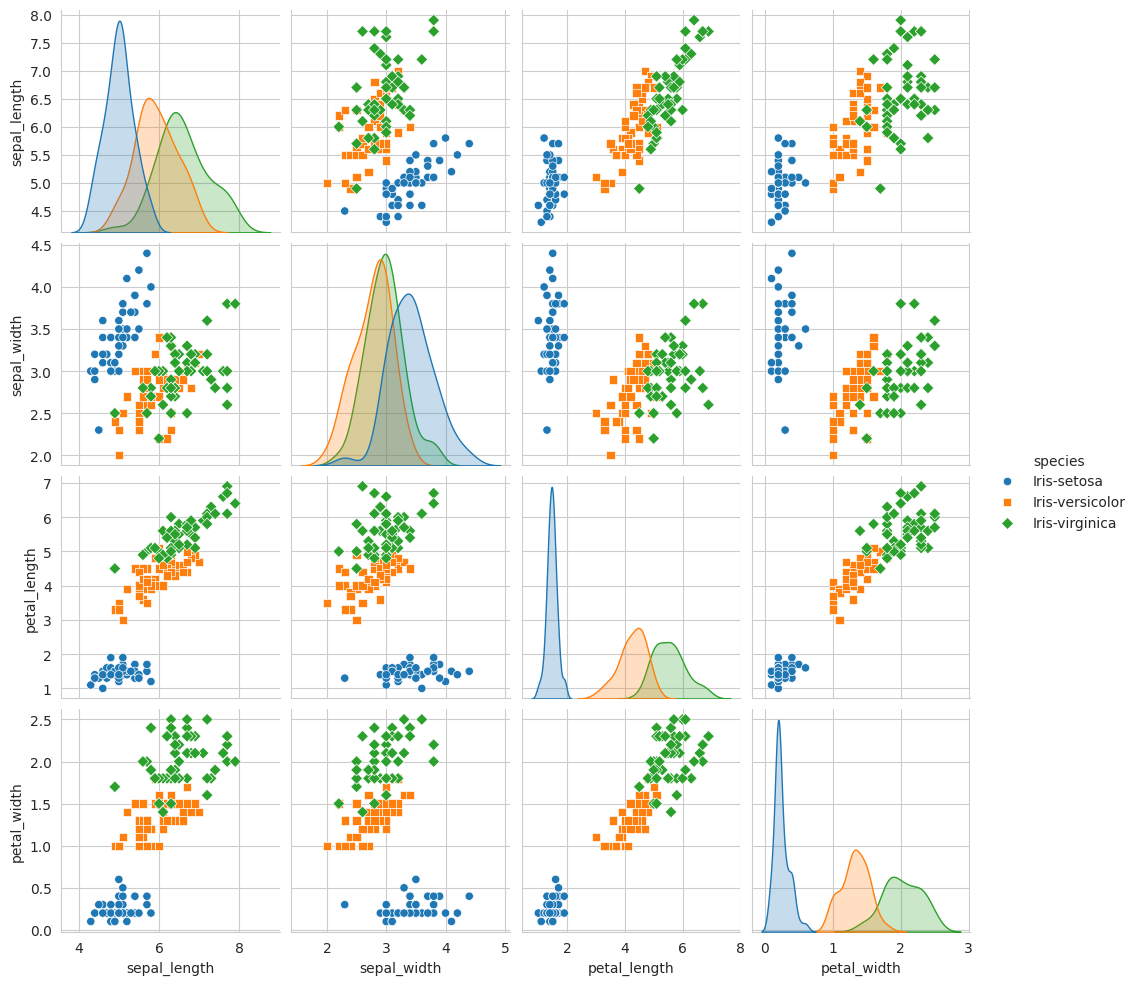

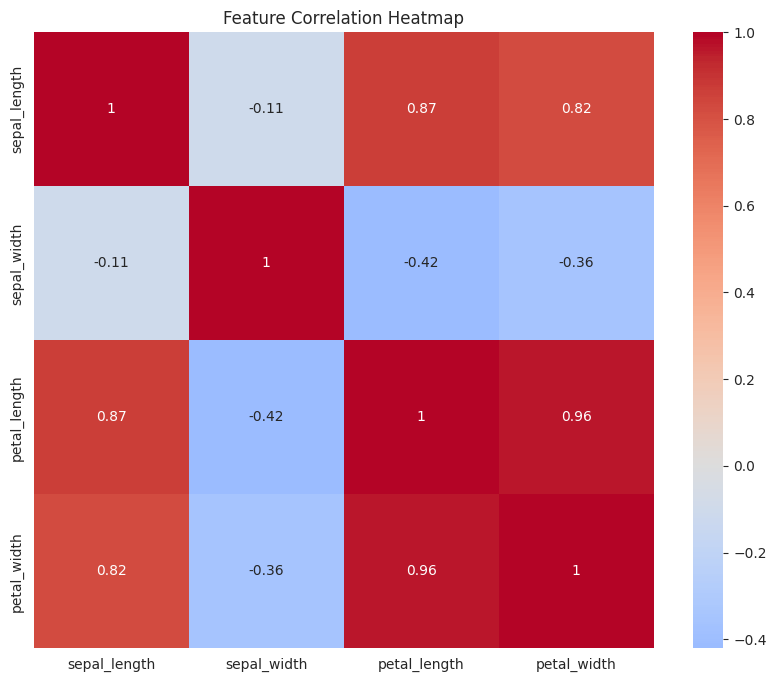

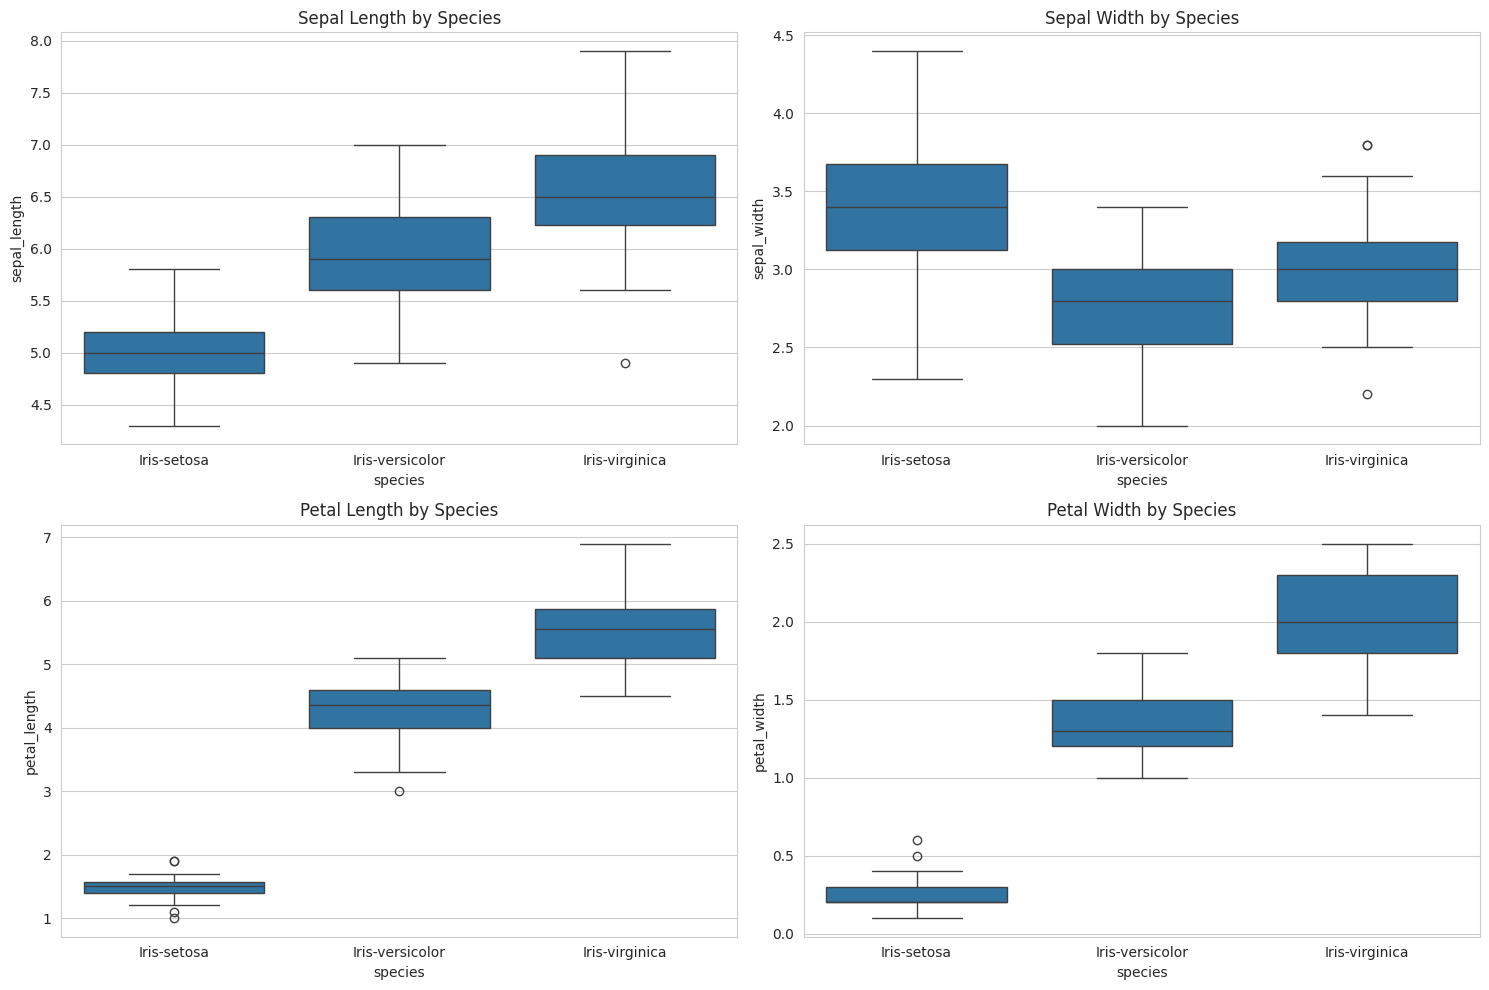

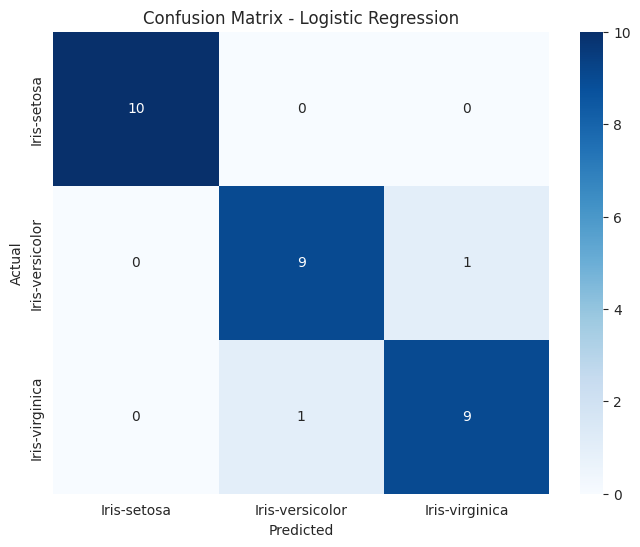

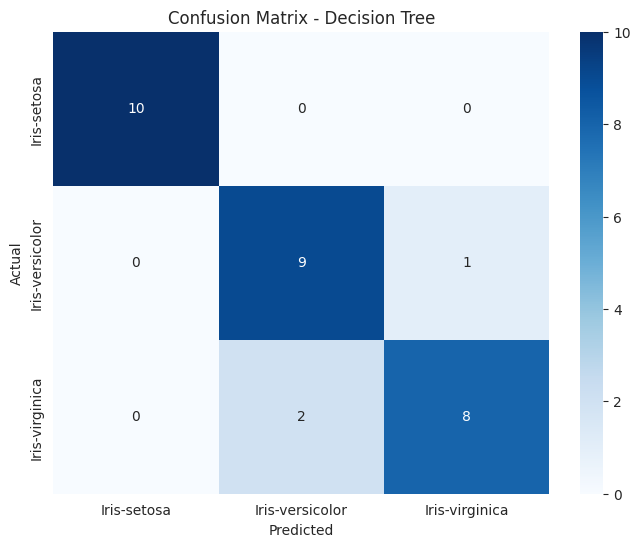

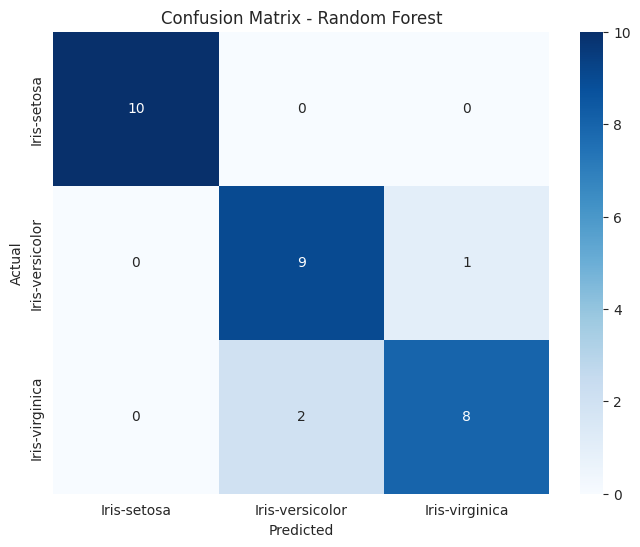

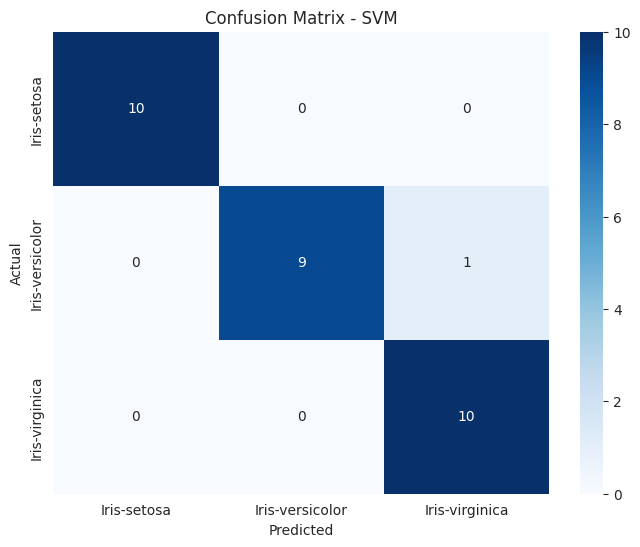

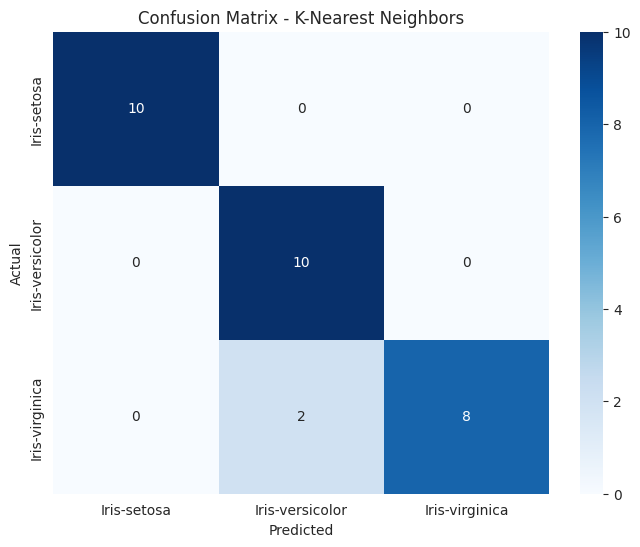

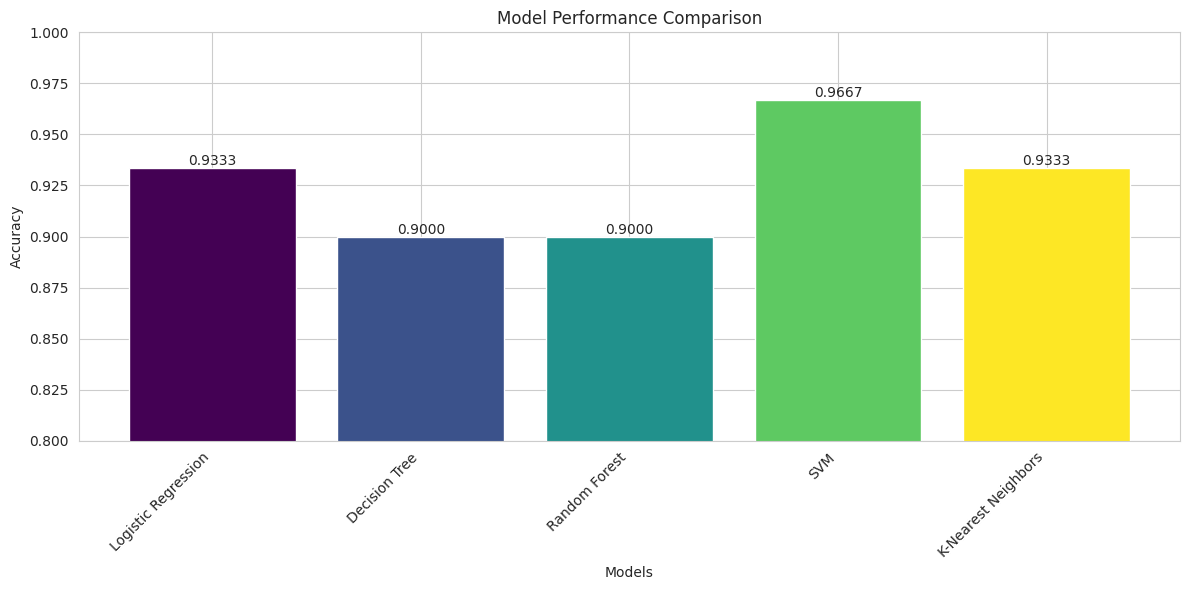

In [5]:
print("=" * 50)
print("IRIS FLOWER CLASSIFICATION MODEL")
print("=" * 50)

# Download dataset from Kaggle using kagglehub
print("\n📥 Downloading dataset from Kaggle...")
path = kagglehub.dataset_download("arshid/iris-flower-dataset")
print(f"✓ Dataset downloaded to: {path}")

# Find the CSV file in the downloaded path
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("No CSV file found in the downloaded dataset")

csv_file = os.path.join(path, csv_files[0])
print(f"✓ Loading file: {csv_files[0]}")

# Load the dataset
df = pd.read_csv(csv_file)

print("\n1. Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nDataset Info:")
print(df.info())
print(f"\nSpecies distribution:")
print(df['species'].value_counts())

# Step 2: Data Exploration
print("\n" + "=" * 50)
print("2. Statistical Summary:")
print("=" * 50)
print(df.describe())

# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Step 3: Data Visualization
print("\n" + "=" * 50)
print("3. Creating Visualizations...")
print("=" * 50)

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Pairplot
print("Creating pairplot...")
pairplot = sns.pairplot(df, hue='species', markers=['o', 's', 'D'])
plt.savefig('iris_pairplot.png', dpi=300, bbox_inches='tight')
print("✓ Pairplot saved as 'iris_pairplot.png'")

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.savefig('iris_correlation.png', dpi=300, bbox_inches='tight')
print("✓ Correlation heatmap saved as 'iris_correlation.png'")

# Box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for idx, feature in enumerate(features):
    row, col = idx // 2, idx % 2
    sns.boxplot(data=df, x='species', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature.replace("_", " ").title()} by Species')
plt.tight_layout()
plt.savefig('iris_boxplots.png', dpi=300, bbox_inches='tight')
print("✓ Box plots saved as 'iris_boxplots.png'")

# Step 4: Data Preprocessing
print("\n" + "=" * 50)
print("4. Data Preprocessing:")
print("=" * 50)

# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\nLabel encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✓ Feature scaling completed")

# Step 5: Model Training and Evaluation
print("\n" + "=" * 50)
print("5. Training Multiple Models:")
print("=" * 50)

models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"✓ {name} Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    # Detailed classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_").lower()}.png', 
                dpi=300, bbox_inches='tight')
    print(f"✓ Confusion matrix saved")

# Step 6: Model Comparison
print("\n" + "=" * 50)
print("6. Model Comparison:")
print("=" * 50)

# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\nModel Accuracy Ranking:")
for idx, (name, accuracy) in enumerate(sorted_results, 1):
    print(f"{idx}. {name}: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Visualize model comparison
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = list(results.values())
colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))

bars = plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim([0.8, 1.0])
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Model comparison chart saved as 'model_comparison.png'")

# Step 7: Select Best Model and Save
print("\n" + "=" * 50)
print("7. Best Model Selection:")
print("=" * 50)

best_model_name = sorted_results[0][0]
best_model = models[best_model_name]
best_accuracy = sorted_results[0][1]

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Save the best model
import pickle

with open('best_iris_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("✓ Best model saved as 'best_iris_model.pkl'")
print("✓ Scaler saved as 'scaler.pkl'")
print("✓ Label encoder saved as 'label_encoder.pkl'")

# Step 8: Make Predictions on New Data
print("\n" + "=" * 50)
print("8. Example Prediction:")
print("=" * 50)

# Example: Predict for a new flower
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example measurements
new_flower_scaled = scaler.transform(new_flower)
prediction = best_model.predict(new_flower_scaled)
predicted_species = le.inverse_transform(prediction)

print(f"New flower measurements: {new_flower[0]}")
print(f"Predicted species: {predicted_species[0]}")

print("\n" + "=" * 50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("=" * 50)
print("\nGenerated Files:")
print("1. iris_pairplot.png - Feature relationships visualization")
print("2. iris_correlation.png - Feature correlation heatmap")
print("3. iris_boxplots.png - Distribution by species")
print("4. confusion_matrix_*.png - Confusion matrices for each model")
print("5. model_comparison.png - Model accuracy comparison")
print("6. best_iris_model.pkl - Trained best model")
print("7. scaler.pkl - Feature scaler")
print("8. label_encoder.pkl - Label encoder")